## Импорт необходимых для анализа модулей

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [13]:
data = pd.read_excel('data.xlsx', header=1)

#### Вывод общей информации о загруженных данных

Для проверки правильности загрузки данных из xlsx-файла

In [14]:
data.columns

Index(['Sp', 'idpl', 'idCP', 'LAT', 'LON', 'ALT', 'IC', 'PN', 'WK', 'CK',
       'IOE', 'Ann_PREC', 'L1p1l', 'L1p2l', 'W1p1l', 'W1p2l', 'L2p3l', 'L2p4l',
       'W2p3l', 'W2p4l', 'L3p6l', 'W3p6l', 'L3p7l', 'W3p7l', 'S2p3l', 'S2p4l',
       'Lkd', 'Wkd', 'OtnWLkd', 'Dvsh', 'Dosh', 'Lp', 'Dpl', 'Lns', 'Wns',
       'Lvs', 'Wvs', 'Dp', 'Dvl', 'Dnl', 'Dc', 'Dvns', 'Dnns', 'Dvvs', 'Dnvs'],
      dtype='object')

#### Подробная информация

Насколько успешно наши данные были загружены, какого типа колонки  и пр. (в частности, здесь - 45 переменных (в т.ч. наименование вида), из которых 35 количественных (float+int) и 10 качественных (object). Всего 590 записей.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 45 columns):
Sp          591 non-null object
idpl        591 non-null int64
idCP        591 non-null object
LAT         591 non-null float64
LON         591 non-null float64
ALT         591 non-null int64
IC          591 non-null float64
PN          591 non-null float64
WK          591 non-null float64
CK          591 non-null float64
IOE         591 non-null float64
Ann_PREC    591 non-null float64
L1p1l       591 non-null float64
L1p2l       590 non-null float64
W1p1l       591 non-null float64
W1p2l       591 non-null float64
L2p3l       591 non-null float64
L2p4l       591 non-null float64
W2p3l       591 non-null float64
W2p4l       591 non-null float64
L3p6l       20 non-null float64
W3p6l       20 non-null float64
L3p7l       20 non-null float64
W3p7l       20 non-null float64
S2p3l       591 non-null float64
S2p4l       591 non-null float64
Lkd         591 non-null float64
Wkd         59

##### Стандартная описательная статистика

Сначала получи информацию о числовых данных. Исключим некоторые колонки, анализ которых заведомо не имеет смысла. Нечисловые данные автоматически исключаются (на данном этапе).

In [16]:
data.drop(['LAT', 'LON', 'idpl', 'ALT'], axis=1).describe()

,IC,PN,WK,CK,IOE,Ann_PREC,L1p1l,L1p2l,W1p1l,W1p2l,...,Wkd,OtnWLkd,Dvsh,Dosh,Lp,Dpl,Lns,Wns,Lvs,Wvs
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,590.000000,591.000000,591.000000,...,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.00000,591.000000,591.000000
mean,39.342832,84.455814,37.816619,-116.734740,1.021227,643.588657,13.351734,13.409492,4.474044,4.474831,...,4.535838,0.331136,4.636726,9.301760,8.753875,2.115635,5.696371,2.01780,6.054653,3.252014
std,5.405182,58.074320,12.998095,36.447187,0.626285,300.004127,2.222782,2.229456,0.827235,0.854328,...,0.788102,0.065097,0.980966,1.544469,2.407997,0.469633,0.843578,0.41852,0.746574,0.417737
min,27.567929,-156.201459,-5.507088,-235.704043,-0.500250,2.186018,7.400000,7.800000,2.680000,2.680000,...,2.520000,0.206027,2.440000,3.420000,4.120000,0.760000,3.300000,1.18000,3.720000,2.160000
25%,34.865899,56.397422,30.944348,-135.289583,0.707975,392.435932,11.710000,11.705000,3.850000,3.880000,...,4.010000,0.285398,3.920000,8.220000,6.970000,1.800000,5.100000,1.74000,5.560000,2.960000
50%,37.212921,83.953700,37.892183,-120.325004,1.011587,456.494556,13.520000,13.640000,4.400000,4.380000,...,4.480000,0.319795,4.500000,9.200000,8.420000,2.120000,5.700000,1.96000,6.040000,3.240000
75%,41.779698,107.193097,48.980919,-80.918556,1.337711,1012.299307,14.850000,15.015000,5.000000,5.000000,...,5.020000,0.364521,5.200000,10.240000,10.020000,2.460000,6.260000,2.20000,6.560000,3.520000
max,59.057297,318.043832,64.348574,-58.206587,4.032114,1150.679022,21.500000,21.680000,7.220000,7.260000,...,7.300000,0.551431,8.160000,16.180000,18.100000,4.020000,9.580000,3.92000,8.600000,5.040000


#### Общая информация о нечисловых признаках

In [17]:
data_nonnum =  data[['Dp','Dvl','Dnl','Dc','Dvns','Dnns','Dvvs','Dnvs']]

In [18]:
data_nonnum.describe()

,Dp,Dvl,Dnl,Dc,Dvns,Dnns,Dvvs,Dnvs
count,591,591,591,590,591,591,591,591
unique,5,5,5,5,5,5,5,4
top,Re,Re,ORe,G,Re,Re,ORe,ORe
freq,266,280,229,371,306,256,400,260


In [19]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [20]:
data_numerical = data[['L1p1l','L1p2l','W1p1l','W1p2l','L2p3l','L2p4l','W2p3l','W2p4l', 'S2p3l','S2p4l','Lkd','Wkd','OtnWLkd','Dvsh','Dosh','Lp','Dpl','Lns','Wns','Lvs','Wvs'
]]

#### Нахождение наиболее постоянных и изменчивых 10 числовых признаков

Выделим 10 наиболее постоянных числовых признаков и построим парные диаграммы распределения в факторном пространстве.

In [21]:
st.variation(data_numerical.as_matrix(), axis=0)

array([ 0.16633798,         nan,  0.18473989,  0.19075687,  0.16026507,
        0.15863096,  0.176398  ,  0.1771973 ,  0.3649496 ,  0.35025975,
        0.15245786,  0.17360298,  0.19642197,  0.21138539,  0.16590001,
        0.27484503,  0.22179422,  0.14796506,  0.20723857,  0.12320153,
        0.12834617])

<span style="color:red; font-weight:bolder">Заметим: что одно значение nan, это значит где-то в колонке L1p2l - попалось либо пропущенное, либо невалидное - т.е. нечисловое значение. Нужно, видимо, это исправить, может какая-то опечатка</span>. А пока, будем продолжать анализ, отбросив такие случаи.

In [22]:
varnames = data_numerical.columns
inds = np.argsort(st.variation(data_numerical.dropna().as_matrix(), axis=0))

inds теперь содержит перечень номеров колонок, отсортированный по возрастанию коэффициента вариации для этих колонок. Нам, фактически, нужны последние наиболее постоянные признаки, пусть их будет 10. Перечислим их:

In [23]:
most_constant = inds[:10]; data_numerical.iloc[:, most_constant].columns

Index(['Lvs', 'Wvs', 'Lns', 'Lkd', 'L2p4l', 'L2p3l', 'Dosh', 'L1p2l', 'L1p1l',
       'Wkd'],
      dtype='object')

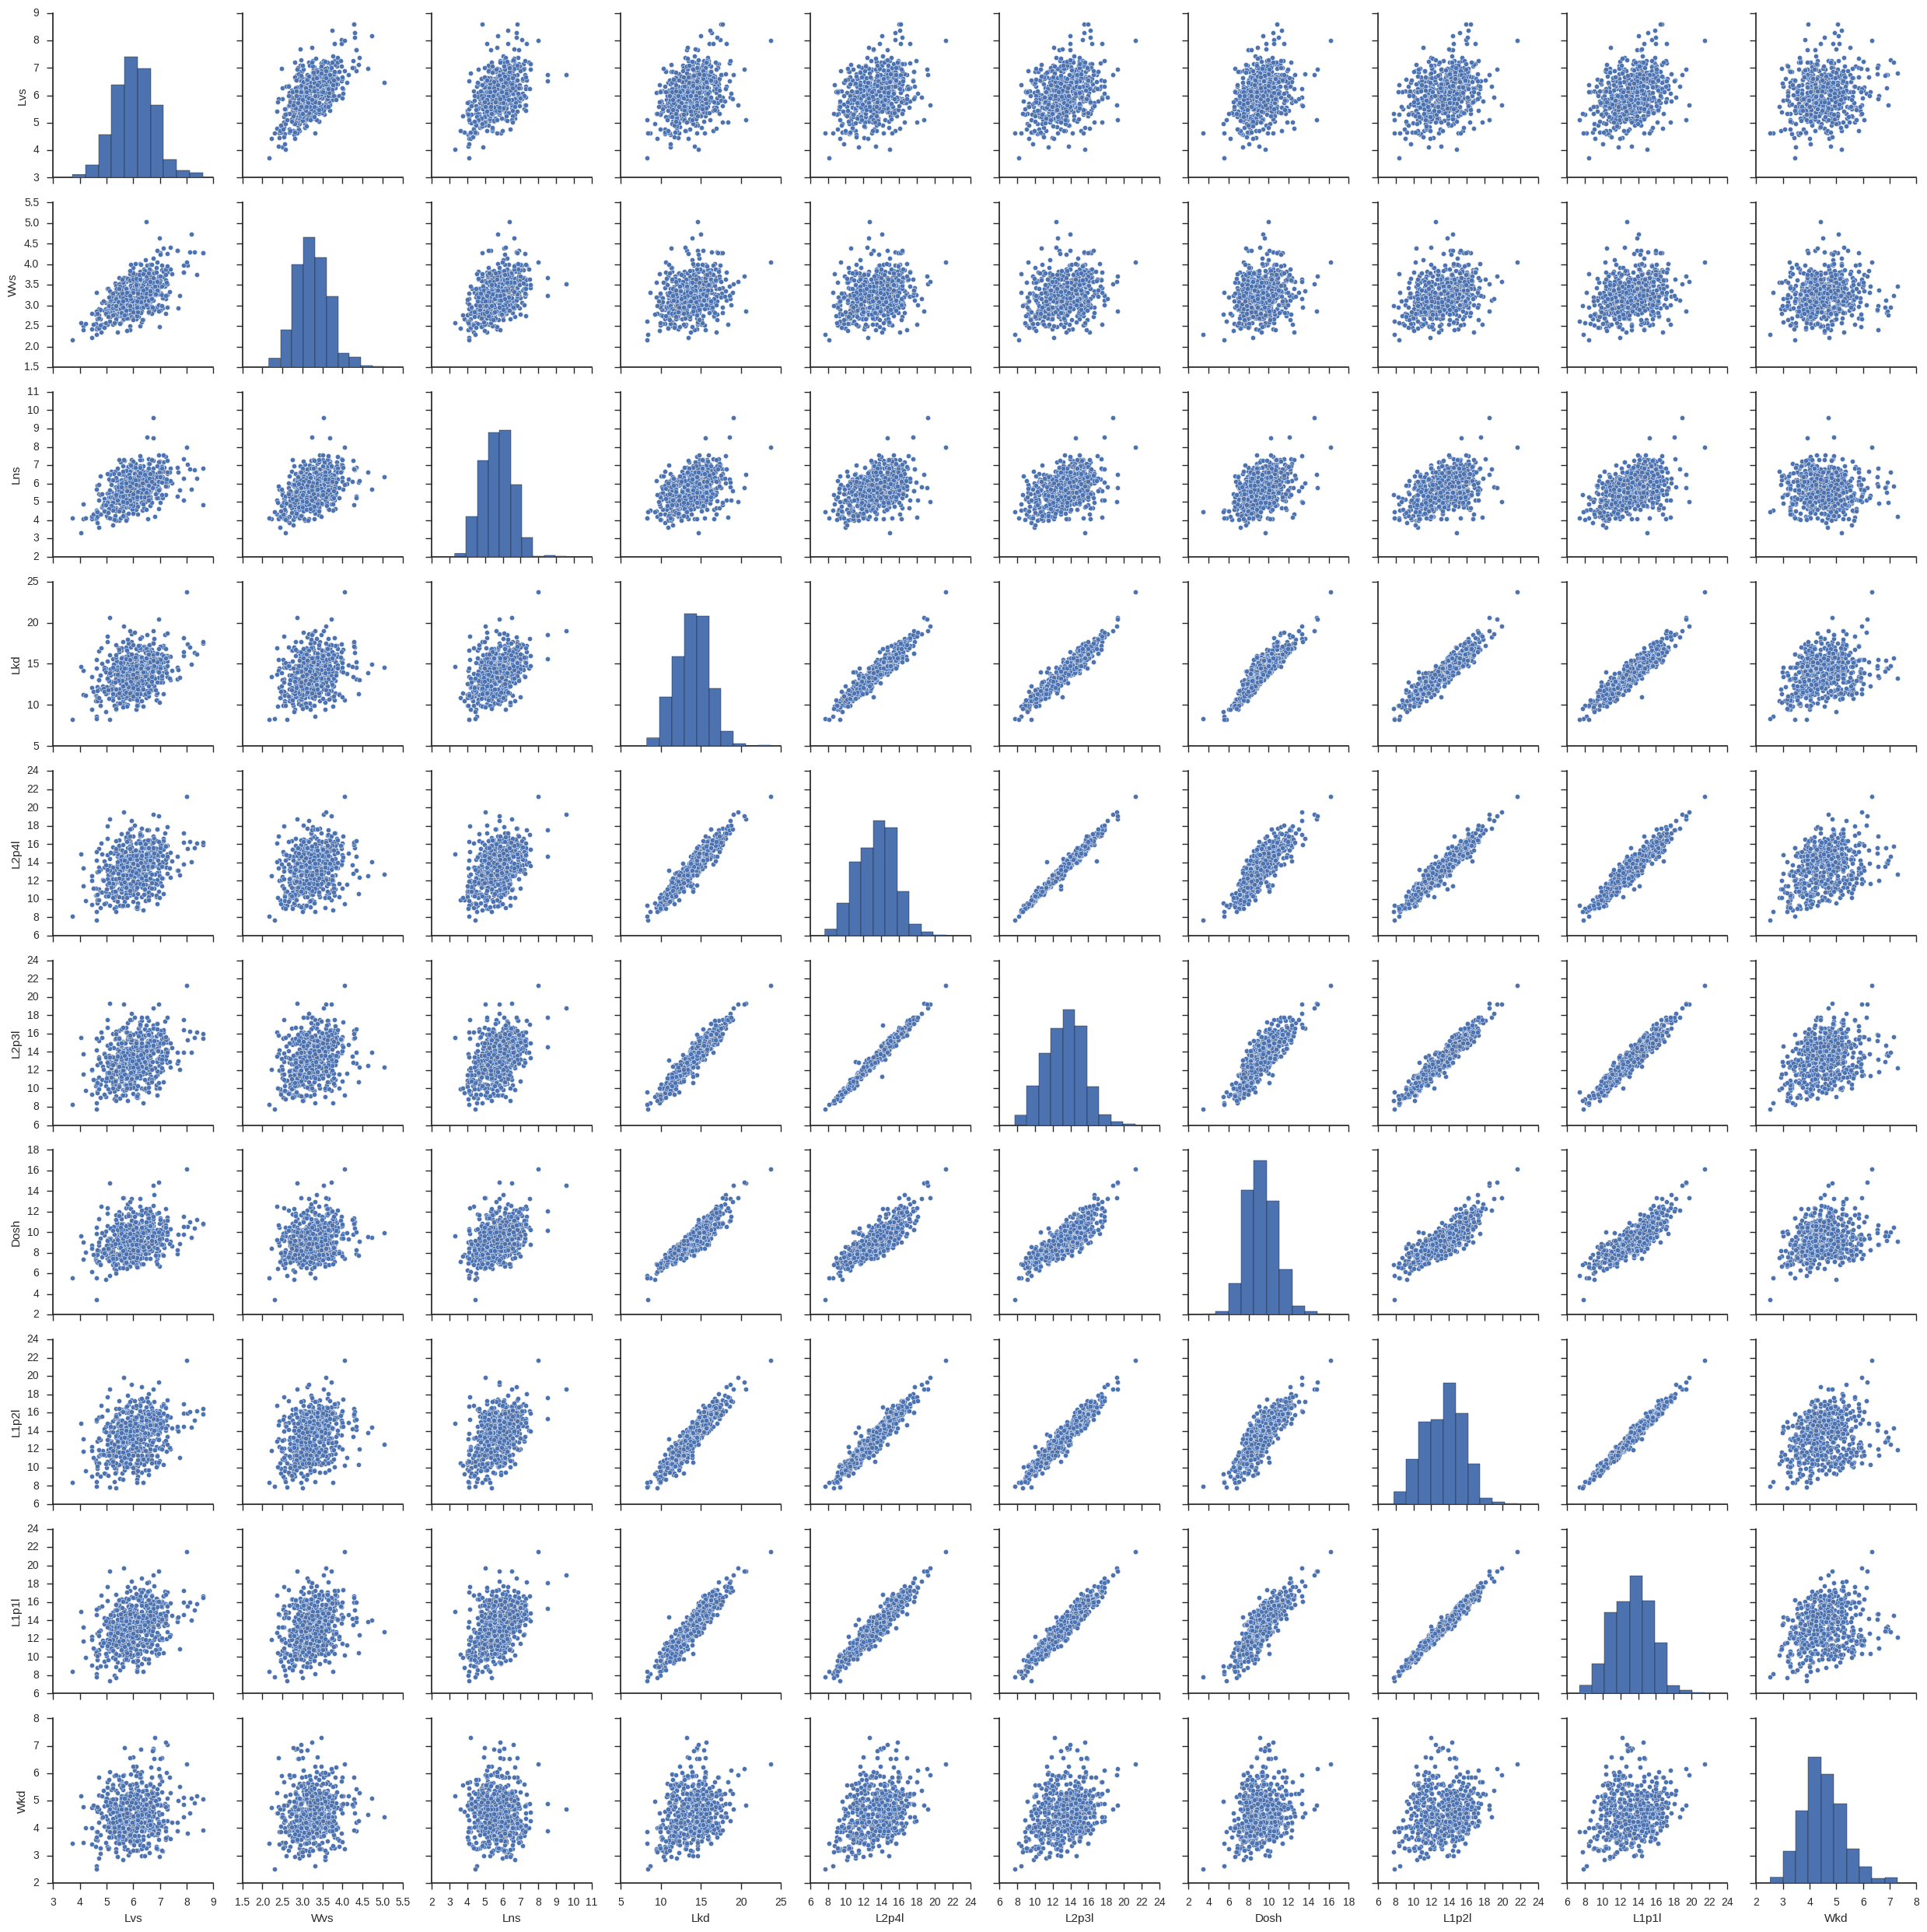

In [24]:
sns.pairplot(data_numerical.dropna().iloc[:, most_constant])
sns.plt.show()

Из рисунка следует (пока без расчетов коэффициентов корреляции), что часть параметров - группа графиков в середине - имеет тесную взаимосвязь друг с другом. В некоторых случаях эта связь почти линейная. Все это наталкивает на мысль о возможной эффективности применения методов снижения размерности в отношении количественных данных.
В отношении наиболее изменчивых признаков, результаты будут следующие:

In [25]:
most_varying = inds[-10:]; data_numerical.iloc[:, most_varying].columns

Index(['W2p4l', 'W1p1l', 'W1p2l', 'OtnWLkd', 'Wns', 'Dvsh', 'Dpl', 'Lp',
       'S2p4l', 'S2p3l'],
      dtype='object')

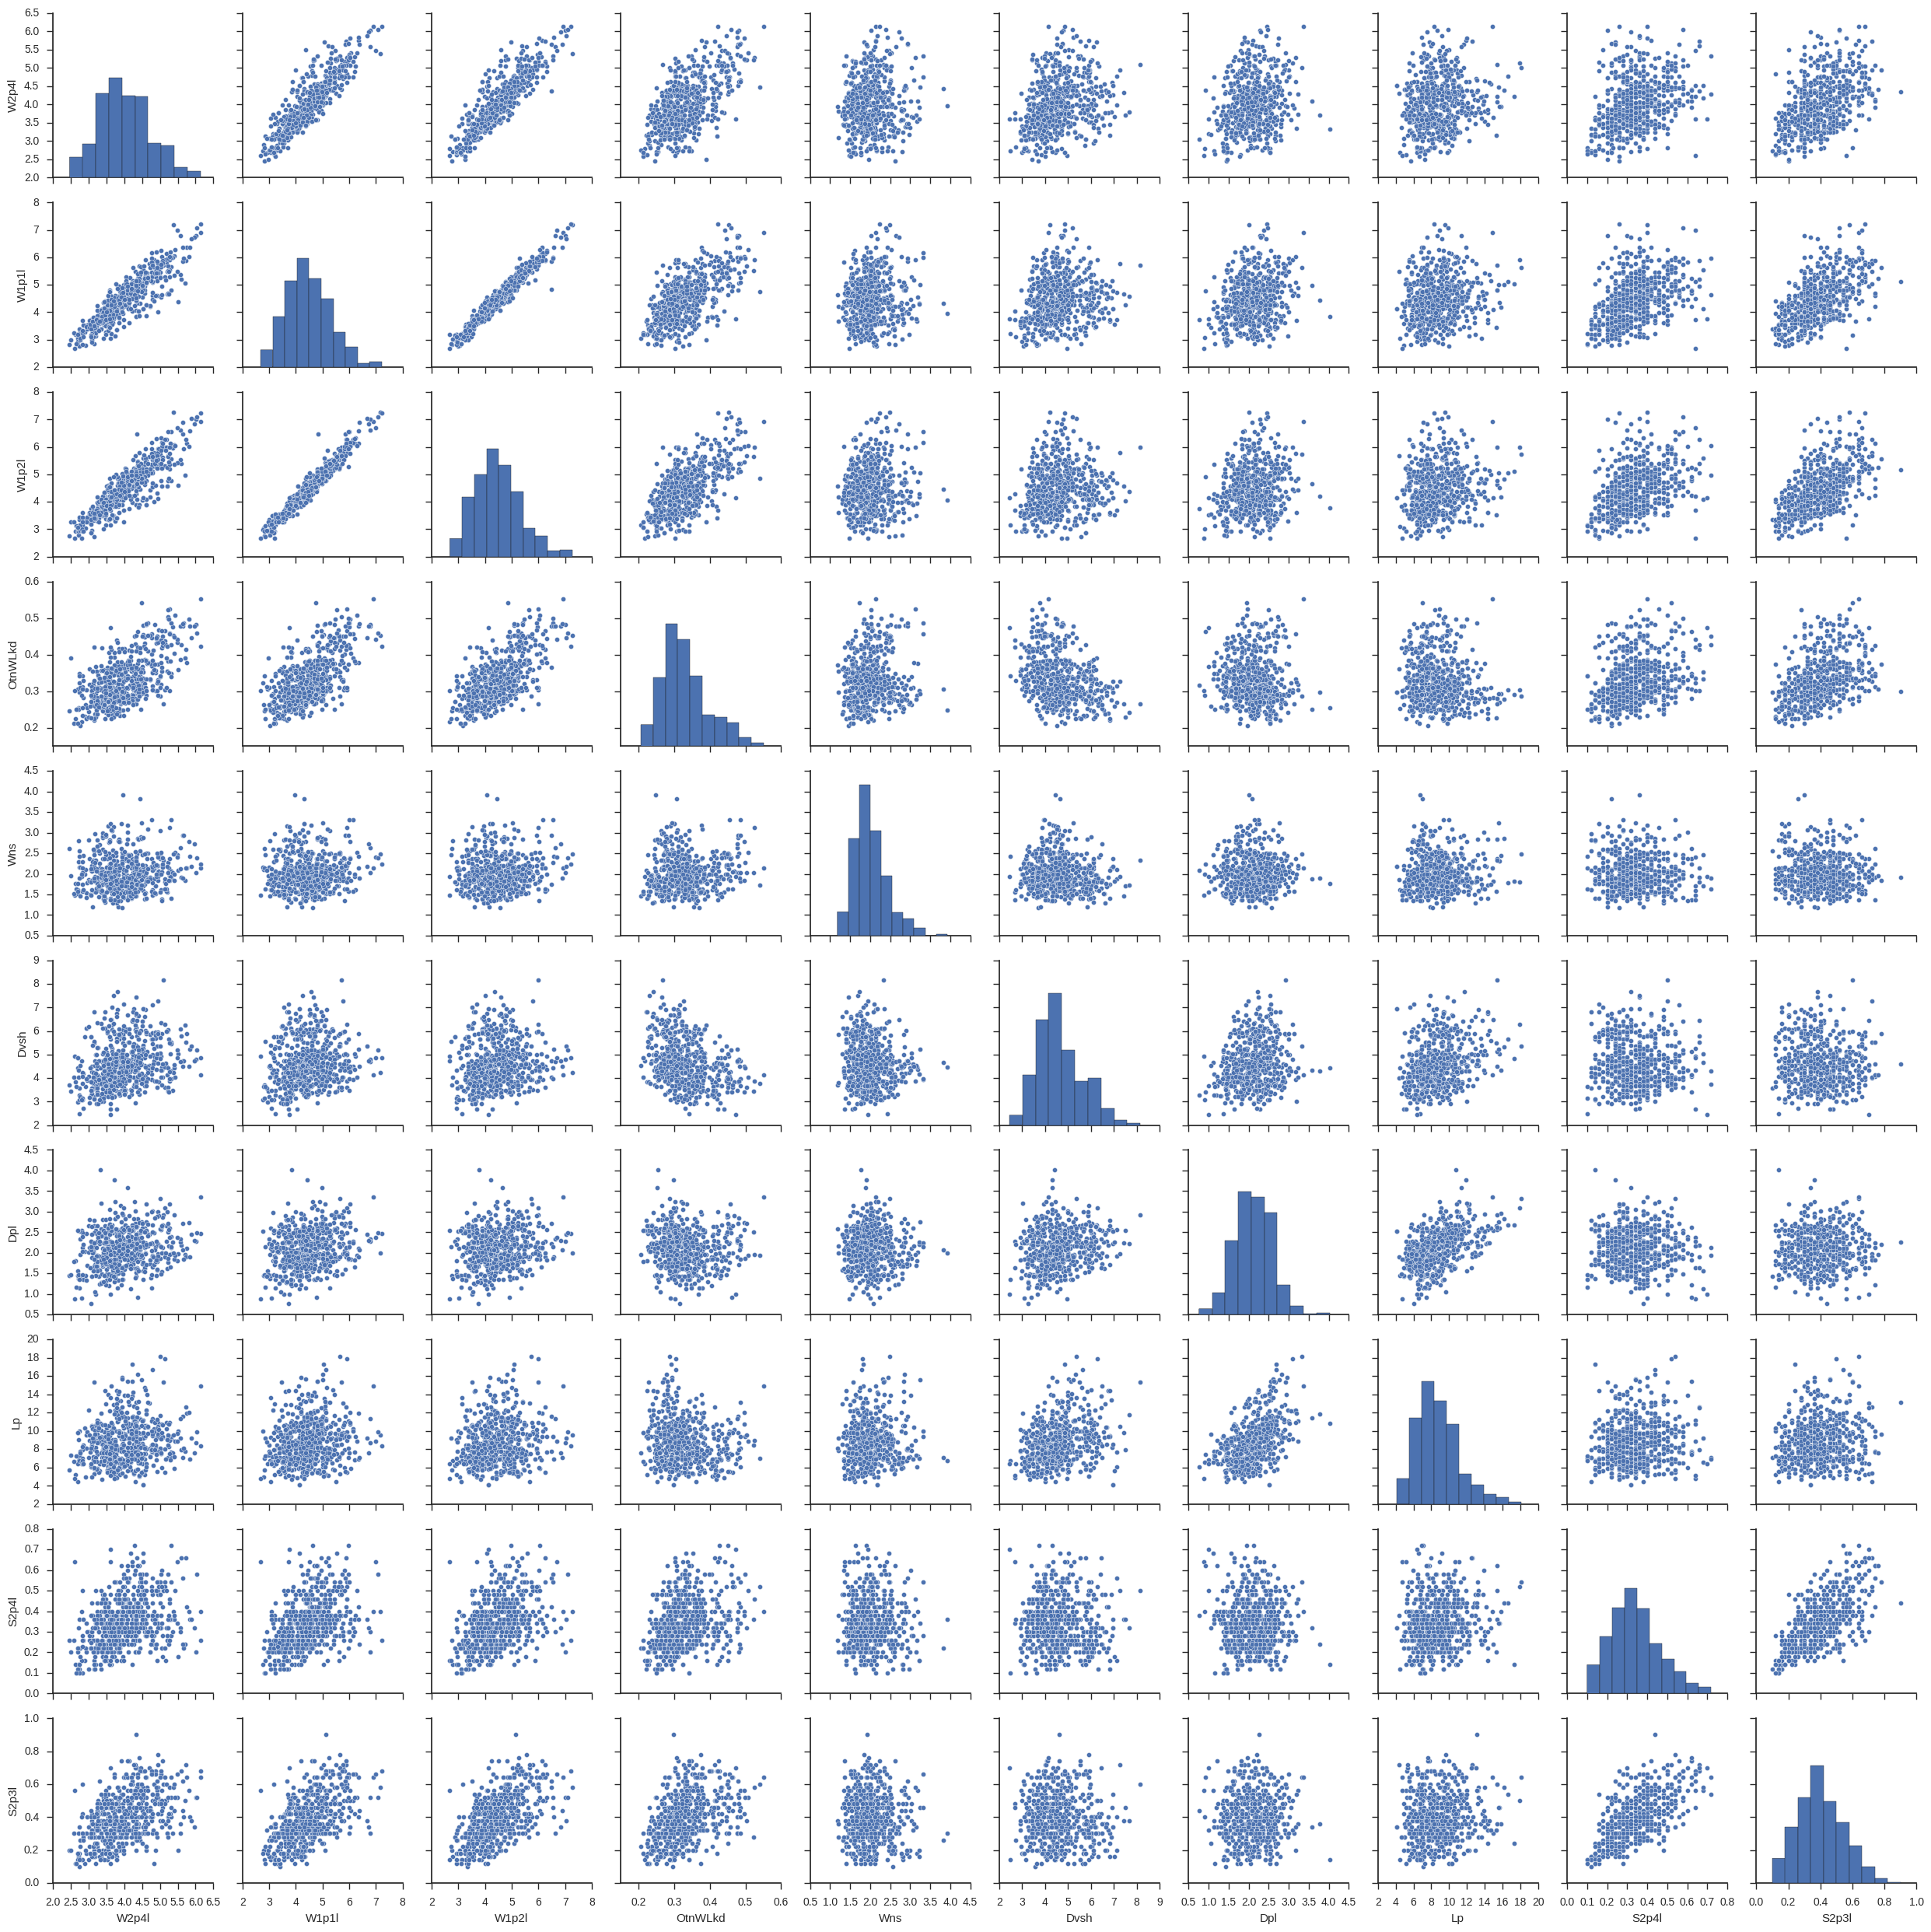

In [26]:
sns.pairplot(data_numerical.dropna().iloc[:, most_varying])
sns.plt.show()

Из наиболее изменчивых признаков, группа, проявляющая высокую парную линейную зависимость - небольшая - четко выделяются первые три переменные; тем не менее, значимые отличия коэффициентов корреляции, полагаю, будут наблюдаться и для других пар. Это, вместе с результатами для маловарьирующих признаков, также основание для примненеия, например, PCA (метода главных компонент).

#### Проекция на факторные просранства меньшей размерности

Выполняется с целью выяснить наименьшее число скалярных параметров адекватно характеризующих изменчивость данных (в исходном пространстве, когда параметров более 30, работать не очень удобно).

In [27]:
from sklearn.decomposition import PCA
from sklearn import manifold

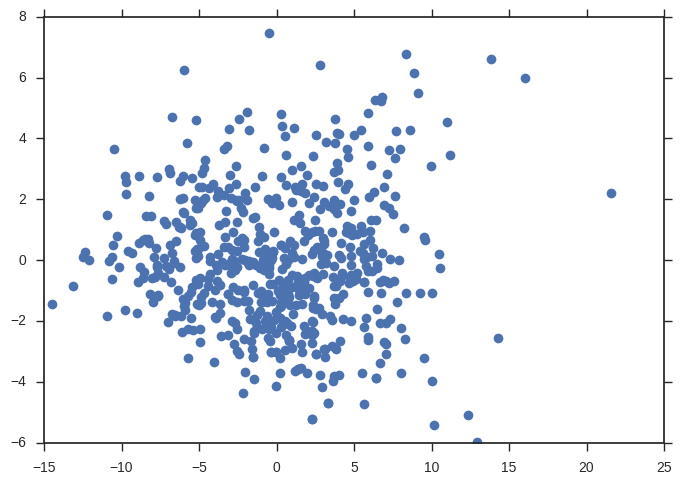

In [73]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_numerical.dropna())
plt.plot(data_pca[:, 0], data_pca[:, 1], 'o')
plt.show()

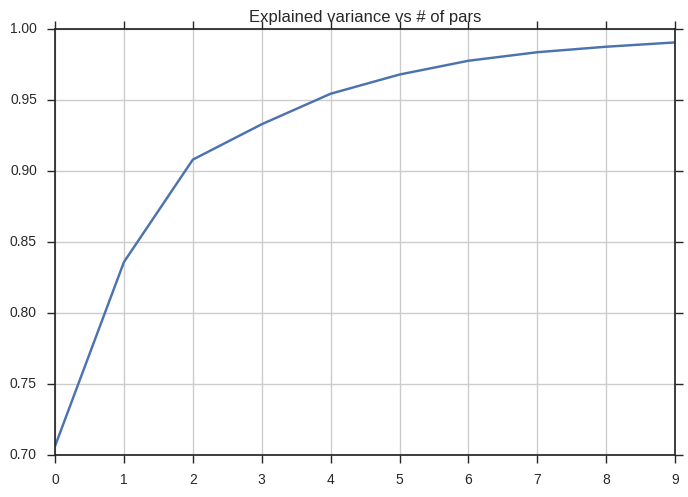

In [92]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.gca().grid('on')
np.cumsum(pca.explained_variance_ratio_)
plt.gca().set_title('Explained variance vs # of pars')

Показатели качества: объясняемая вариация (var). 0.83 (при двух компонентах) - прямо сказать, не так уж и много. Следовательно, двумя скалярными компонентами изменчивость данных описывается не очень точно. 95% изменчивости данных хорошо объясняются 5 скалярными обобщенными параметрами.

#### Ядерный анализ главных компонент (ядро - радиальная базисная функция)

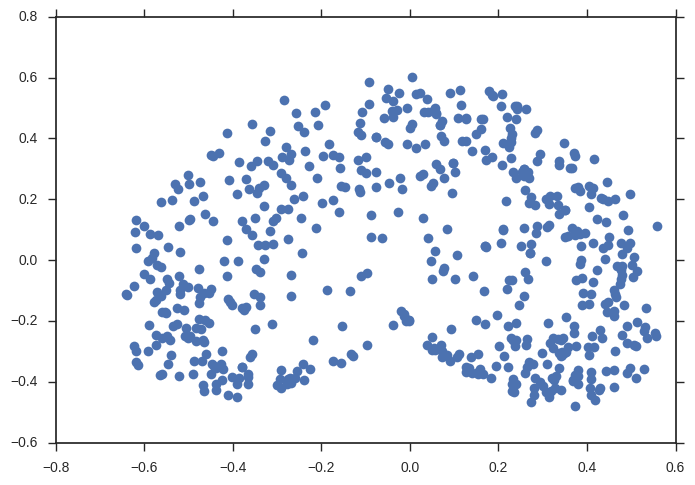

In [88]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=50, kernel='rbf')
data_kpca = kpca.fit_transform(data_numerical.dropna())
plt.plot(data_kpca[:, 0], data_kpca[:, 1], 'o')

In [90]:
explained_var_kpca = np.var(data_kpca,axis=0)
explained_var_kpca_ratio = explained_var_kpca / np.sum(explained_var_kpca)
np.cumsum(explained_var_kpca_ratio)

array([ 0.18113711,  0.31086201,  0.38642714,  0.44518831,  0.49640881,
        0.5401712 ,  0.57907535,  0.61474014,  0.64364972,  0.6676693 ,
        0.68969028,  0.71030573,  0.72939746,  0.74574431,  0.76080338,
        0.77526006,  0.78804137,  0.80015791,  0.81186633,  0.8231056 ,
        0.83378824,  0.84379399,  0.85333893,  0.86237139,  0.87097726,
        0.87892424,  0.88654781,  0.89398105,  0.90097398,  0.9077396 ,
        0.91404693,  0.91992053,  0.92558195,  0.93113167,  0.93645791,
        0.94155518,  0.94658107,  0.95137209,  0.95608581,  0.9606687 ,
        0.96516509,  0.96954202,  0.97377295,  0.97780578,  0.98171999,
        0.98548527,  0.98922959,  0.99290639,  0.99648786,  1.        ])

rbf, а также другие ядра, предалагемые sklearn, не приносят ничего нового. Вполне достаточно рассматривать 5 скалярных параметров для описания изменчивости данных (в рамках PCA они объясняют 95% изменчивости данных).

### Анализ нечисловых данных

## Выводы: